In [1]:
# Impor library utama untuk analisis data
import numpy as np
import pandas as pd

# Impor library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Impor dataset dari Scikit-learn
from sklearn.datasets import fetch_california_housing

# Pengaturan agar plot dari matplotlib ditampilkan langsung di notebook
%matplotlib inline

print('Semua library berhasil diimpor!')

Matplotlib is building the font cache; this may take a moment.


Semua library berhasil diimpor!


In [2]:
# Memuat dataset ke dalam sebuah variabel
california = fetch_california_housing()

# Mari kita lihat apa saja yang ada di dalam objek dataset ini
print(california.keys())

# Anda juga bisa membaca deskripsi lengkap datasetnya (opsional tapi sangat dianjurkan)
# print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
# Membuat DataFrame dari data fitur dan nama kolomnya
df = pd.DataFrame(california.data, columns=california.feature_names)

# Kita tambahkan kolom target (harga rumah) ke DataFrame kita
# Nama targetnya adalah 'MedHouseVal' (Median House Value)
df['MedHouseVal'] = california.target

# Tampilkan 5 baris pertama untuk memastikan semuanya benar
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Melihat informasi umum: jumlah baris, kolom, tipe data, dan nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Mendapatkan ringkasan statistik (rata-rata, standar deviasi, min, max, dll.)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


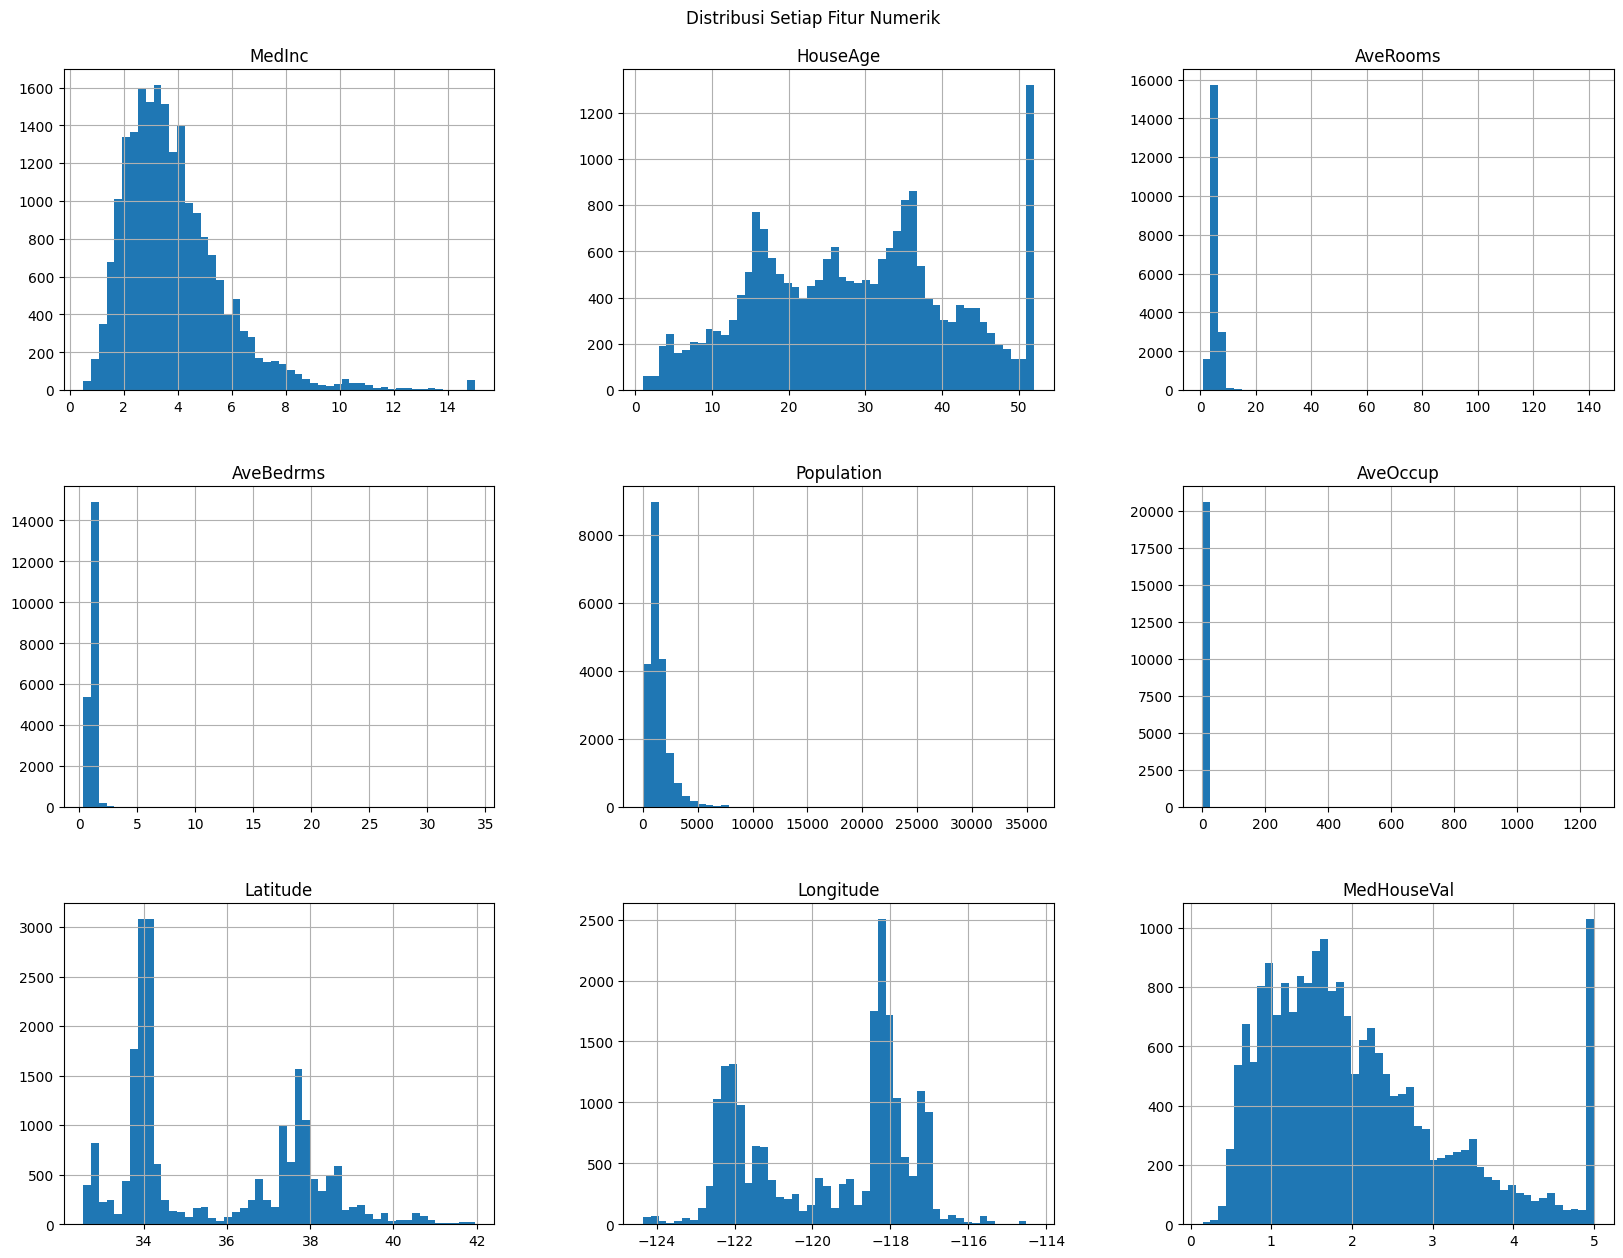

In [6]:
# Membuat histogram untuk semua kolom numerik
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribusi Setiap Fitur Numerik", y=0.92)
plt.show()

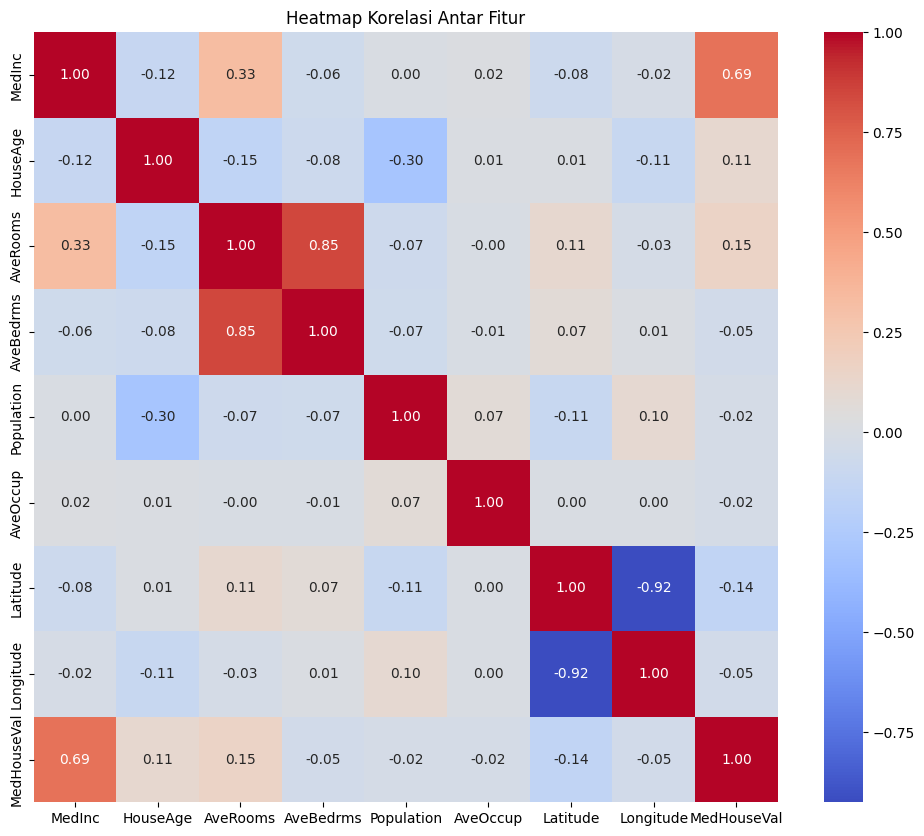

In [7]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [8]:
# Memisahkan fitur (X) dan target (y)
# X adalah semua kolom KECUALI MedHouseVal
X = df.drop('MedHouseVal', axis=1) 

# y adalah HANYA kolom MedHouseVal
y = df['MedHouseVal']

# Mari kita cek hasilnya
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Fitur (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [9]:
# Impor fungsi train_test_split dari scikit-learn
from sklearn.model_selection import train_test_split

# Membagi data dengan perbandingan 80:20
# random_state=42 digunakan agar hasil pembagian data kita selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dari setiap set data yang sudah dibagi
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (16512, 8)
Ukuran X_test: (4128, 8)
Ukuran y_train: (16512,)
Ukuran y_test: (4128,)


In [10]:
# Impor StandardScaler
from sklearn.preprocessing import StandardScaler

# Buat objek scaler
scaler = StandardScaler()

# Lakukan fit dan transform pada data latih (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Lakukan HANYA transform pada data uji (X_test)
X_test_scaled = scaler.transform(X_test)

# Catatan: Hasil dari scaler adalah NumPy array, bukan lagi Pandas DataFrame. 
# Ini adalah format yang disukai oleh model Scikit-learn.
print("Contoh data setelah di-scaling:")
print(X_train_scaled[:5]) # Tampilkan 5 baris pertama dari data yang sudah di-scaling

Contoh data setelah di-scaling:
[[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


In [11]:
# Impor kelas model Linear Regression
from sklearn.linear_model import LinearRegression

print("Siap untuk membuat model Regresi Linear.")

Siap untuk membuat model Regresi Linear.


In [12]:
# 1. Membuat objek (instance) dari model Regresi Linear
lin_reg = LinearRegression()

# 2. Melatih model dengan data latih yang sudah di-scaling
# Model akan belajar dari X_train_scaled untuk bisa memprediksi y_train
lin_reg.fit(X_train_scaled, y_train)

print("Model Regresi Linear berhasil dilatih!")

Model Regresi Linear berhasil dilatih!


In [13]:
# Ambil 5 baris pertama dari data uji yang sudah di-scaling
some_data = X_test_scaled[:5]

# Ambil 5 label (jawaban) yang sebenarnya dari data uji
# Kita gunakan .iloc untuk mengambil baris berdasarkan posisinya
some_labels = y_test.iloc[:5]

# Minta model yang sudah dilatih untuk memprediksi harga dari 'some_data'
print("Membuat prediksi...")
predicted_labels = lin_reg.predict(some_data)

# Tampilkan hasil prediksi berdampingan dengan jawaban asli
print("Prediksi Model:", predicted_labels)
print("Jawaban Asli:", list(some_labels))

Membuat prediksi...
Prediksi Model: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Jawaban Asli: [0.477, 0.458, 5.00001, 2.186, 2.78]


In [14]:
# Gunakan model yang sudah dilatih untuk membuat prediksi pada seluruh data uji
print("Membuat prediksi untuk seluruh data uji...")
full_predictions = lin_reg.predict(X_test_scaled)

print("Prediksi selesai dibuat.")
print(f"Jumlah prediksi yang dibuat: {len(full_predictions)}")

Membuat prediksi untuk seluruh data uji...
Prediksi selesai dibuat.
Jumlah prediksi yang dibuat: 4128


In [15]:
# Impor fungsi mean_absolute_error
from sklearn.metrics import mean_absolute_error

# Hitung MAE
mae = mean_absolute_error(y_test, full_predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.5332


In [16]:
# Impor fungsi mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Hitung MSE terlebih dahulu, lalu akarkan untuk mendapatkan RMSE
mse = mean_squared_error(y_test, full_predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.7456


In [17]:
# Impor fungsi r2_score
from sklearn.metrics import r2_score

# Hitung R-squared
r2 = r2_score(y_test, full_predictions)

print(f"R-squared (R2 Score): {r2:.4f}")

R-squared (R2 Score): 0.5758
